# COVID-19 detection Using X-Ray Images

---
© 2021 Zaka AI, Inc. All Rights Reserved

**Objective:** The goal of this hands-on workshop is to build a model that can detect whether a patient has COVID-19 or not based on X-ray images provided as input.

##Importing the Libraries

We start by importing some of the libraries that we will use for later.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import random

##Importing the dataset

###Cloning the github repository

We clone the github repository that contains our dataset

In [ ]:
!git clone https://github.com/zaka-ai/COVID-19-Detection-Using-X-Ray-Images

Cloning into 'COVID-19-Detection-Using-X-Ray-Images'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


###Unzipping the Dataset

The repository contains the data in a zipped format, and this is why, we need to unzip the folder to be able to use the images in the dataset.

In [ ]:
!unzip "/content/COVID-19-Detection-Using-X-Ray-Images/Dataset.zip" 

Archive:  /content/COVID-19-Detection-Using-X-Ray-Images/Dataset.zip
   creating: Dataset/Testing/
   creating: Dataset/Testing/COVID/
  inflating: Dataset/Testing/COVID/COVID-1054.png  
  inflating: Dataset/Testing/COVID/COVID-1181.png  
  inflating: Dataset/Testing/COVID/COVID-1290.png  
  inflating: Dataset/Testing/COVID/COVID-1320.png  
  inflating: Dataset/Testing/COVID/COVID-1413.png  
  inflating: Dataset/Testing/COVID/COVID-18.png  
  inflating: Dataset/Testing/COVID/COVID-1806.png  
  inflating: Dataset/Testing/COVID/COVID-2060.png  
  inflating: Dataset/Testing/COVID/COVID-2063.png  
  inflating: Dataset/Testing/COVID/COVID-2133.png  
  inflating: Dataset/Testing/COVID/COVID-215.png  
  inflating: Dataset/Testing/COVID/COVID-2236.png  
  inflating: Dataset/Testing/COVID/COVID-2289.png  
  inflating: Dataset/Testing/COVID/COVID-2385.png  
  inflating: Dataset/Testing/COVID/COVID-2415.png  
  inflating: Dataset/Testing/COVID/COVID-2515.png  
  inflating: Dataset/Testing/COVID/C

###Inspecting the dataset

After the dataset has been loaded, we need to explore it and see what it contains.

Let's start by defining the paths for training, validation and testing.

In [ ]:
training_path = "/content/Dataset/Training"
validation_path = "/content/Dataset/Validation"
testing_path = "/content/Dataset/Testing"

Now, we will observe the number of samples per class in each subset of our data.

In [ ]:
import os
#Training Set
covid_training = len(os.listdir(os.path.join(training_path, "COVID")))
normal_training = len(os.listdir(os.path.join(training_path, "Normal")))

print(f"We have {covid_training} COVID images and {normal_training} Normal images in our training set")

We have 200 COVID images and 200 Normal images in our training set


In [ ]:
#Validation Set
covid_val = len(os.listdir(os.path.join(validation_path,"COVID")))
normal_val = len(os.listdir(os.path.join(validation_path, "Normal")))

print(f"We have {covid_val} COVID images and {normal_val} Normal images in our validation set")

We have 50 COVID images and 50 Normal images in our validation set


In [ ]:
#Testing Set
covid_test = len(os.listdir(os.path.join(testing_path,"COVID")))
normal_test = len(os.listdir(os.path.join(testing_path, "Normal")))

print(f"We have {covid_test} COVID images and {normal_test} Normal images in our testing set")

We have 25 COVID images and 25 Normal images in our testing set


Now we will visualize some images in the training set.

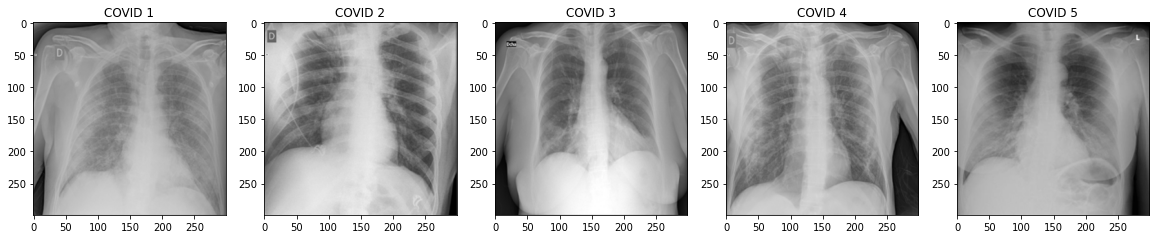

In [ ]:
#COVID cases
all_images = os.listdir(os.path.join(training_path,"COVID"))
display_images = random.sample(all_images, 5)

fig = plt.figure(figsize=(20, 7))

for index, image_name in enumerate(display_images):
  img_path = os.path.join(training_path, "COVID", image_name)
  img = cv2.imread(img_path)
  fig.add_subplot(1,5, index+1)
  plt.imshow(img)
  plt.title(f"COVID {index+1}")

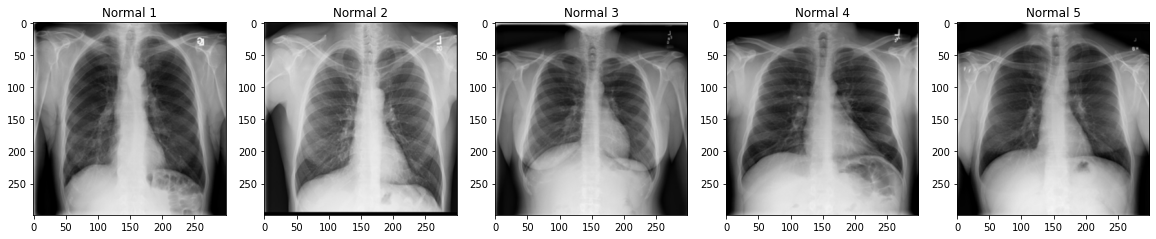

In [ ]:
#Normal cases
all_images = os.listdir(os.path.join(training_path,"Normal"))
display_images = random.sample(all_images, 5)
fig = plt.figure(figsize=(20, 7))

for index, image_name in enumerate(display_images):
  img_path = os.path.join(training_path, "Normal", image_name)
  img = cv2.imread(img_path)
  fig.add_subplot(1,5, index+1)
  plt.imshow(img)
  plt.title(f"Normal {index+1}")

##Modeling

###Build a CNN

We will build a CNN that takes an image as input and gives as output the probability that this image belongs to a person who's testing positive.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

###Visualize the model.

Let us see the architecture of the model.

In [ ]:
!pip install visualkeras

     |████████████████████████████████| 795 kB 4.9 MB/s 


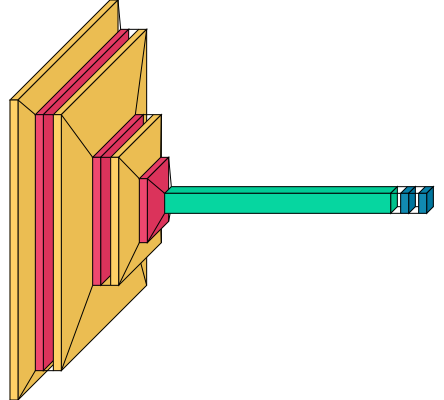

In [ ]:
import visualkeras
visualkeras.layered_view(model, max_z = 226, min_z=8, max_xy=300)

We use the ImageDataGenerator Class to helps us get our data from their directories. The ImageDataGenerator Class helps also in applying some real-time operations and image augmentations for your data.

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
	training_path,
	target_size=(128, 128),
  classes = ['Normal', 'COVID'],
	class_mode='binary',
)

val_generator = datagen.flow_from_directory(
	validation_path,
	target_size=(128, 128),
  classes = ['Normal', 'COVID'],
	class_mode='binary',
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Discover the label associated with each class.

In [ ]:
train_generator.class_indices

{'COVID': 1, 'Normal': 0}

###Training the Model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, epochs=5, validation_data = val_generator, verbose = 1)

Epoch 1/5
13/13 [==============================] - 9s 585ms/step - loss: 0.5955 - accuracy: 0.6725 - val_loss: 0.4374 - val_accuracy: 0.8100
Epoch 2/5
13/13 [==============================] - 7s 562ms/step - loss: 0.2853 - accuracy: 0.8975 - val_loss: 0.2685 - val_accuracy: 0.8600
Epoch 3/5
13/13 [==============================] - 7s 561ms/step - loss: 0.1764 - accuracy: 0.9225 - val_loss: 0.1603 - val_accuracy: 0.9500
Epoch 4/5
13/13 [==============================] - 7s 584ms/step - loss: 0.1164 - accuracy: 0.9550 - val_loss: 0.1942 - val_accuracy: 0.9200
Epoch 5/5
13/13 [==============================] - 7s 558ms/step - loss: 0.1782 - accuracy: 0.9250 - val_loss: 0.1209 - val_accuracy: 0.9400


###Evaluate the Model on Unseen Data

Now, we need to see the performance of our model on unseen data to see how well it does.

In [ ]:
test_generator = datagen.flow_from_directory(
	testing_path,
	target_size=(128, 128),
  classes = ['Normal', 'COVID'],
	class_mode='binary',
  shuffle = False,
	batch_size = 50
)

Found 50 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

1/1 [==============================] - 0s 371ms/step - loss: 0.1280 - accuracy: 0.9800


[0.1279914677143097, 0.9800000190734863]

####Plot the Confusion Matrix of the Model

Get the predictions corresponding to the testing set

In [ ]:
predictions = model.predict(test_generator)
predictions = predictions>0.5
predictions = predictions.astype(int)

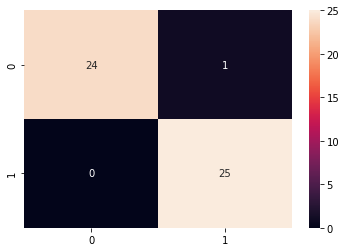

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_generator.classes, predictions)
sns.heatmap(cm, annot=True)

##See some predictions of our model

Now, we will be seeing the predictions that are done by our model on several images that we will provide as input.

In [ ]:
test_generator.batch_size = 1
test_generator.shuffle = True

Text(0.5, 1.0, 'Pred: 0, True: [0.]')

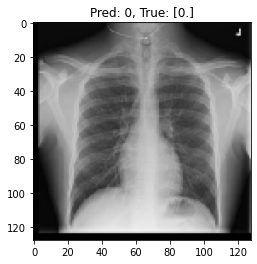

In [ ]:
img = test_generator.next()
#img[0] holds the image and img[1] holds the label of the image
prediction = int(model.predict(img[0])>0.5)
plt.imshow(img[0][0])
plt.title(f"Pred: {prediction}, True: {img[1]}")